# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from collections import Counter
from matplotlib.pylab import savefig

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

## Load file and create dataframe

In [3]:
folder = './Data'

csv = 'Bidirectional Interface - learning.csv'

In [4]:
answers_df = pd.read_csv(os.path.join(folder, csv))

answers_df_sim = answers_df.iloc[[8,9,11,12,17,18,19,20,21]]
answers_df_sim

answers_df_hw = answers_df.iloc[[13,14,15,16]]
# answers_df_sim

## Separate questions

In [5]:
data_sim = {}
data_hw = {}


age = 'Age'
gender = 'Gender'
experience_controller = 'How experienced are you with the use of remote controllers?'
experience_controller_drone = 'How experienced are you with the use of remote controllers for controlling drones?'
easier_first = 'Which interface was easier to use in the FIRST run?'
easier_last = 'Which interface was easier to use in the LAST run?'
prefered = 'Which interface did you prefer?'
why = 'Why?'
feedback = 'Please give your personal feedback/impressions'

questions = [age, gender, experience_controller, experience_controller_drone, easier_first, easier_last, prefered, why, feedback]

for q in questions:
    data_sim[q] = answers_df_sim[q].values
for q in questions:
    data_hw[q] = answers_df_hw[q].values

## Compute mean and average

In [6]:
def compute_stats(data):

    stats = {}

    mean_index = 0
    std_index = 1

    for q in [age, experience_controller, experience_controller_drone]:
        stats[q] = [0, 0]
        stats[q][mean_index] = np.mean(data[q])
        stats[q][std_index] = np.std(data[q])

    return stats

stats_sim = compute_stats(data_sim)
stats_hw = compute_stats(data_hw)

## Results

In [7]:
# Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

# data (similarly data_hw) can be used to create boxplot for the distribution of answers.

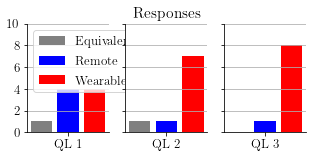

In [8]:
resp_data = {}

resp_data[easier_first] = Counter(data_sim[easier_first])
resp_data[easier_last] = Counter(data_sim[easier_last])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[prefered]['Equivalent'] = 0

fig = plt.figure(figsize = (5,2))

qs = ['QL 1', 'QL 2', 'QL 3']

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, len(resp_data), 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        
        lab = i if 'We' not in i else 'Wearable'
        if 'Re' in i:
            lab = 'Remote' 
#         lab = i if 'Remote' in i else 'Remote'
        
        plt.bar(1+idx, resp[idx], label = lab, color = c[idx])
    
    if jdx==0:
        plt.legend(loc = 'upper left')  
        plt.yticks([0, 2, 4, 6, 8, 10])
    else:
        plt.yticks([0, 2, 4, 6, 8, 10], ['','','','','',''])
        
    if jdx==1:
        plt.title('Responses')
    
    ax.yaxis.grid()
    plt.ylim(0,10)
    plt.xticks([2],[qs[jdx]], axes=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

savefig('learn_quest.pdf', bbox_inches='tight')

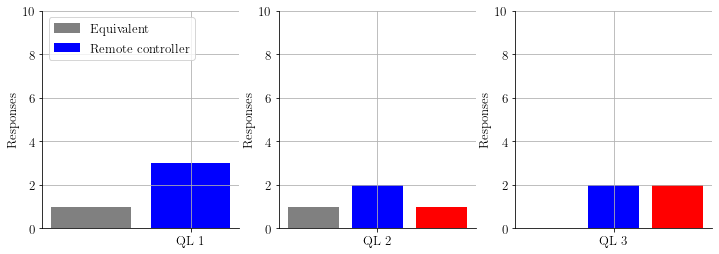

In [9]:
resp_data = {}

resp_data[easier_first] = Counter(data_hw[easier_first])
resp_data[easier_last] = Counter(data_hw[easier_last])
resp_data[prefered] = Counter(data_hw[prefered])

resp_data[prefered]['Equvalent'] = 0

fig = plt.figure(figsize = (12,4))

qs = ['QL 1', 'QL 2', 'QL 3']

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, len(resp_data), 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        
        lab = i if 'We' not in i else 'Motion-based'
        
        plt.bar(1+idx, resp[idx], label = lab, color = c[idx])
    
    if jdx==0:
        plt.legend(loc = 'upper left')  
    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2],[qs[jdx]], axes=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.ylabel('Responses')
    

savefig('learn_quest.pdf', bbox_inches='tight')

## <span style="color:red">Interesting subjective feedback</span>

# Questionnaires

In [10]:
why_answers = data_sim[why]

print('SIMULATION')
print('-----------')
print(why)
print('-----------')
print()

for w in why_answers:
    print(w)
    print()
    
print('-----------')
print(feedback)
print('-----------')
print()

feed_answers = data_sim[feedback]

for f in feed_answers:
    print(f)
    print()

SIMULATION
-----------
Why?
-----------

more fun, more intuitive (I did not have to think to the right handle to move as from the beginning)

The joystick had a mapping of the inputs/outputs which is not what I am used to with drones. Therefore, I needed to get used to it and then the task got easier. Instead, with the wearable, I expected immediately that if I moved my hand up the drone would go up etc.

I have much more experience with the remote control through video games and it was the first time I used motion control.

I had an easier time understanding the controls of the wearable than I did of the video game controller

Because with the wearable you could make much more smooth and precise movement than the remote controller which it felt like drone kept overshooting the position I wanted it to be in. 

It seemed to be more natural after a while 

It's easier to use it and to learn. The movements are smoother

Wearable is much more fun to use

more intuitive and more fun

-----

## <span style="color:blue">Need to check out these</span>

# Backup - pie charts

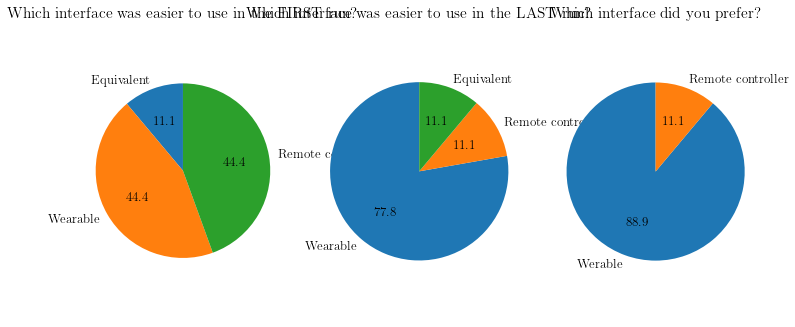

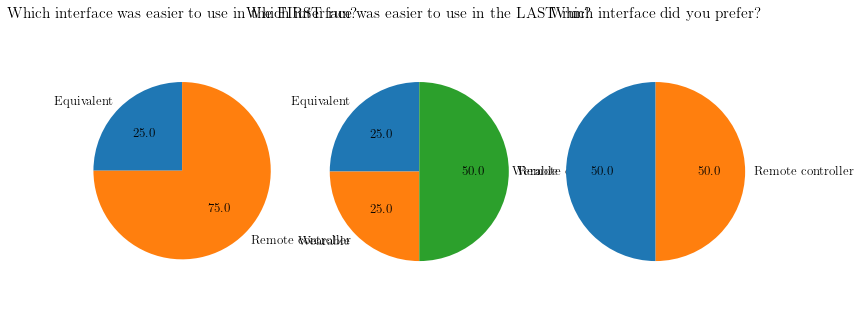

In [11]:
def plot_pies(data):
    
    plt.figure(figsize = (12,12))

    gender_pie_data = Counter(data[gender])
    easier_first_pie_data = Counter(data[easier_first])
    easier_last_pie_data = Counter(data[easier_last])
    prefered_pie_data = Counter(data[prefered])

#     ax1 = plt.subplot(221)
#     ax1.pie(gender_pie_data.values(), labels=gender_pie_data.keys(), autopct='%1.1f%%', startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax1.set_title(gender)

    ax1 = plt.subplot(231)
    ax1.pie(easier_first_pie_data.values(), labels=easier_first_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier_first)

    ax1 = plt.subplot(232)
    ax1.pie(easier_last_pie_data.values(), labels=easier_last_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier_last)

    ax1 = plt.subplot(233)
    ax1.pie(prefered_pie_data.values(), labels=prefered_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(prefered)

    plt.show()
    
plot_pies(data_sim)
plot_pies(data_hw)

In [12]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [13]:
w

'more intuitive and more fun'

# Analyse survey

## Imports

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from statistics import print_p
from matplotlib.pylab import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load file and create dataframe

In [15]:
folder = './Data'

files = os.listdir(folder)

csv = 'NASA_TLX_learn_first (Risposte) - Risposte del modulo 1.csv'

In [16]:
answers_df = pd.read_csv(os.path.join(folder, csv))

# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df_hw = answers_df_hw[answers_df_hw['subject number'] != 103]
answers_df = answers_df[answers_df['subject number'] < 100]

## Separate dataframe depending on interface/run

In [17]:
types = ['remote-first', 'remote-last', 'motion-first', 'motion-last']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[0]] = answers[types[0]][answers[types[0]]['Run'] == 'First']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers[types[1]][answers[types[1]]['Run'] == 'Last']
answers[types[2]] = answers_df[answers_df['Interface'] == 'Motion']
answers[types[2]] = answers[types[2]][answers[types[2]]['Run'] == 'First']
answers[types[3]] = answers_df[answers_df['Interface'] == 'Motion']
answers[types[3]] = answers[types[3]][answers[types[3]]['Run'] == 'Last']

answers_hw = {}
answers_hw[types[0]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[0]] = answers_hw[types[0]][answers_hw[types[0]]['Run'] == 'First']
answers_hw[types[1]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[1]] = answers_hw[types[1]][answers_hw[types[1]]['Run'] == 'Last']
answers_hw[types[2]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']
answers_hw[types[2]] = answers_hw[types[2]][answers_hw[types[2]]['Run'] == 'First']
answers_hw[types[3]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']
answers_hw[types[3]] = answers_hw[types[3]][answers_hw[types[3]]['Run'] == 'Last']

## Separate questions

In [18]:
data_NASA = {}
data_NASA_hw = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions_NASA = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data_NASA[i] = {}
    data_NASA_hw[i] = {}
    for q in questions_NASA:
        data_NASA[i][q] = answers[i][q].values
        data_NASA_hw[i][q] = answers_hw[i][q].values

In [19]:
print(data_NASA_hw)

{'remote-first': {'How mentally demanding was the test?': array([1, 1, 2, 3]), 'How physically demanding was the test?': array([1, 1, 1, 1]), 'How hurried or rushed was the pace of the task?': array([1, 1, 1, 1]), 'How successful were you in accomplishing what you were asked to do?': array([4, 5, 4, 4]), 'How insecure, discouraged, irritated, stresses, and annoyed were you?': array([1, 1, 1, 2])}, 'remote-last': {'How mentally demanding was the test?': array([1, 2, 2, 2]), 'How physically demanding was the test?': array([1, 1, 1, 1]), 'How hurried or rushed was the pace of the task?': array([1, 1, 1, 1]), 'How successful were you in accomplishing what you were asked to do?': array([5, 3, 4, 5]), 'How insecure, discouraged, irritated, stresses, and annoyed were you?': array([1, 1, 1, 1])}, 'motion-first': {'How mentally demanding was the test?': array([1, 1, 4, 1]), 'How physically demanding was the test?': array([2, 1, 1, 1]), 'How hurried or rushed was the pace of the task?': array([1

## Compute mean and average

In [20]:
stats_NASA = {}
stats_NASA_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats_NASA[i] = {}
    stats_NASA_hw[i] = {}
    for q in questions_NASA:
        stats_NASA[i][q] = [0, 0]
        stats_NASA[i][q][mean_index] = np.mean(data_NASA[i][q])
        stats_NASA[i][q][std_index] = np.std(data_NASA[i][q])
        
        stats_NASA_hw[i][q] = [0, 0]
        stats_NASA_hw[i][q][mean_index] = np.mean(data_NASA_hw[i][q])
        stats_NASA_hw[i][q][std_index] = np.std(data_NASA_hw[i][q])
        
print(stats_NASA)

{'remote-first': {'How mentally demanding was the test?': [3.0, 1.0954451150103321], 'How physically demanding was the test?': [1.1, 0.3], 'How hurried or rushed was the pace of the task?': [2.2, 1.2489995996796797], 'How successful were you in accomplishing what you were asked to do?': [3.3, 1.2688577540449522], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.1, 1.044030650891055]}, 'remote-last': {'How mentally demanding was the test?': [2.7, 0.9], 'How physically demanding was the test?': [1.1, 0.3], 'How hurried or rushed was the pace of the task?': [2.4, 1.42828568570857], 'How successful were you in accomplishing what you were asked to do?': [3.5, 0.806225774829855], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.7, 1.004987562112089]}, 'motion-first': {'How mentally demanding was the test?': [2.1, 0.5385164807134505], 'How physically demanding was the test?': [1.7, 0.7810249675906655], 'How hurried or rushed was the pace o

## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

In [21]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

In [22]:
for idx,i in enumerate(types):
    for j in types[idx+1:]:
        print()
        for q in questions_NASA:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones
                if ('first' in i and 'first' in j) or ('last' in i and 'last' in j) or ('remote' in i and 'remote' in j) or ('motion' in i and 'motion' in j):

                    t, p = t_test_kruskal(data_NASA[i][q],data_NASA[j][q])
                    print(i,j,q)
                    print_p(p)


remote-first remote-last How mentally demanding was the test?
p = 0.3819481156357243
remote-first remote-last How physically demanding was the test?
p = 1.0
remote-first remote-last How hurried or rushed was the pace of the task?
p = 0.8131265746121165
remote-first remote-last How successful were you in accomplishing what you were asked to do?
p = 0.6095403306113734
remote-first remote-last How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.29059351739551387

remote-first motion-first How mentally demanding was the test?
p = 0.03344653009997241 !!!!!!
remote-first motion-first How physically demanding was the test?
p = 0.0488888176268915 !!!!!!
remote-first motion-first How hurried or rushed was the pace of the task?
p = 0.38833837171788765
remote-first motion-first How successful were you in accomplishing what you were asked to do?
p = 0.7760053230332041
remote-first motion-first How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.3042

[[0, 0, 1], [0.4, 0.4, 1], [1, 0, 0], [1, 0.4, 0.4]]


/Users/lis/Documents/github/Bidirectional_Interface/data_analysis/Surveys/../my_plots.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


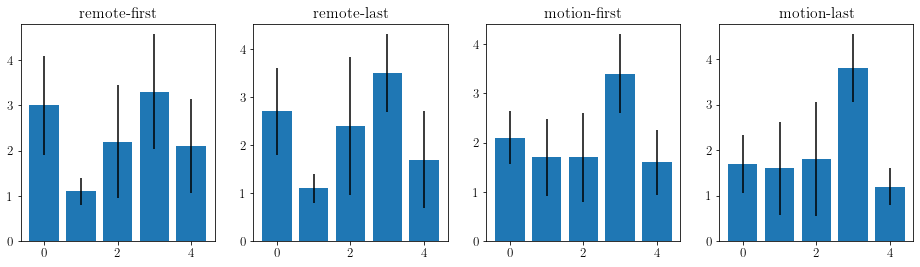

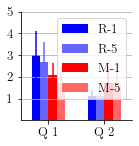

In [23]:
plt.figure(figsize=(16,4))

vals = []
errors = []

for idx, s in enumerate(stats_NASA):
#     print(stats[s])
    
    means = [stats_NASA[s][q][0] for q in questions_NASA]
    stds = [stats_NASA[s][q][1] for q in questions_NASA]
    
#     print(means)
#     print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    
    vals.append(means[0:2])
    errors.append(stds[0:2])
    
lighter = 0.4
c1 = [0,0,1] 
c2 = [lighter,lighter,1] 
c3 = [1,0,0] 
c4 = [1,lighter,lighter]    

col = [c1, c2, c3, c4]

plt.figure(figsize=(2,2))
ax = plt.subplot(111)
ax = my_plots.bar_multi(vals, errors, legend = ['R-1','R-5','M-1','M-5'], xlabels = ['Q 1', 'Q 2'], w =0.15, xlim = [0.5,2.5], yticks = [1,2,3,4,5], save = True, where = 'learn_NASA.pdf', colors = col)
plt.yticks([1,2,3,4,5])
plt.xlim(0.5,2.5)
ax.xaxis.grid()

savefig('learn_NASA.pdf', bbox_inches='tight')

## <span style="color:red">Interesting statistics (see below)</span>
### remote-first motion-first How physically demanding was the test? p =  0.0488888176268915
### remote-last motion-last How physically demanding was the test? p =  0.23390621098854886
### remote-last motion-last How mentally demanding was the test? p =  0.01913961955875495
### motion-first remote-first How mentally demanding was the test? p =  0.03344653009997241

In [24]:
for idx,i in enumerate(types):
    for j in types[idx+1:]:
        print()
        for q in questions_NASA:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones
                if ('first' in i and 'first' in j) or ('last' in i and 'last' in j) or ('remote' in i and 'remote' in j) or ('motion' in i and 'motion' in j):

                    t, p = t_test_kruskal(data_NASA[i][q],data_NASA_hw[j][q])
                    print(i,j,q)
                    print_p(p)


remote-first remote-last How mentally demanding was the test?
p = 0.05772262403716874 !
remote-first remote-last How physically demanding was the test?
p = 0.5270892568655423
remote-first remote-last How hurried or rushed was the pace of the task?
p = 0.058467610474556904 !
remote-first remote-last How successful were you in accomplishing what you were asked to do?
p = 0.19982027836122043
remote-first remote-last How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.02983944090024813 !!!!!!

remote-first motion-first How mentally demanding was the test?
p = 0.17731327675163272
remote-first motion-first How physically demanding was the test?
p = 0.4850446216203933
remote-first motion-first How hurried or rushed was the pace of the task?
p = 0.16974813073259676
remote-first motion-first How successful were you in accomplishing what you were asked to do?
p = 0.19982027836122043
remote-first motion-first How insecure, discouraged, irritated, stresses, and annoyed wer

[[0, 0, 1], [0.4, 0.4, 1], [1, 0, 0], [1, 0.4, 0.4]]


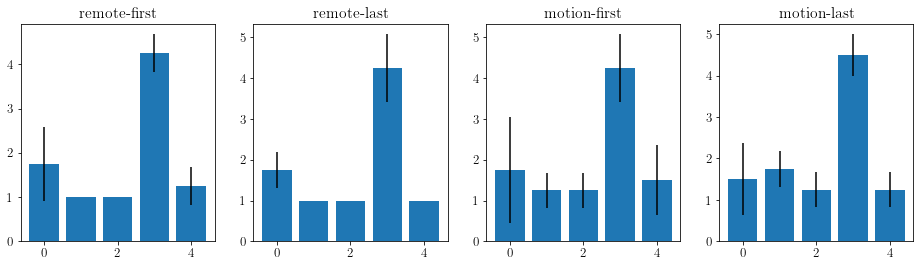

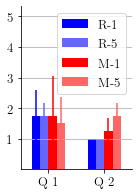

In [25]:
plt.figure(figsize=(16,4))

vals = []
errors = []

for idx, s in enumerate(stats_NASA_hw):
#     print(stats[s])
    
    means = [stats_NASA_hw[s][q][0] for q in questions_NASA]
    stds = [stats_NASA_hw[s][q][1] for q in questions_NASA]
    
#     print(means)
#     print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    
    vals.append(means)
    errors.append(stds)
    
lighter = 0.4
c1 = [0,0,1] 
c2 = [lighter,lighter,1] 
c3 = [1,0,0] 
c4 = [1,lighter,lighter]    

col = [c1, c2, c3, c4]

plt.figure(figsize=(2,3))
ax = plt.subplot(111)
ax = my_plots.bar_multi(vals, errors, legend = ['R-1','R-5','M-1','M-5'], xlabels = ['Q 1', 'Q 2'], w =0.15, xlim = [0.5,2.5], yticks = [1,2,3,4,5], save = True, where = 'learn_NASA.pdf', colors = col)
plt.yticks([1,2,3,4,5])
plt.xlim(0.5,2.5)
ax.xaxis.grid()

# FINAL PLOTS

[[0, 0, 1], [0.4, 0.4, 1], [1, 0, 0], [1, 0.4, 0.4]]


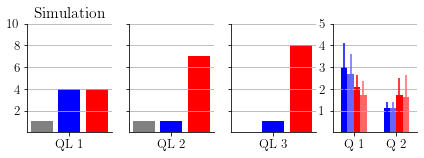

In [26]:
resp_data = {}

resp_data[easier_first] = Counter(data_sim[easier_first])
resp_data[easier_last] = Counter(data_sim[easier_last])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[prefered]['Equivalent'] = 0

fig = plt.figure(figsize = (7,2))

qs = ['QL 1', 'QL 2', 'QL 3']

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 4, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        
        lab = i if 'We' not in i else 'Wearable'
        if 'Re' in i:
            lab = 'Remote' 
#         lab = i if 'Remote' in i else 'Remote'
        
        plt.bar(1+idx, resp[idx], label = lab, color = c[idx])
    
    if jdx==0:
#         plt.legend(loc = 'upper left')  
        plt.yticks([2, 4, 6, 8, 10])
        plt.title('Simulation')  
    else:
        plt.yticks([2, 4, 6, 8, 10], ['','','','','',''])
        
    if jdx==1:
        pass
#         plt.title('Responses')
    
    ax.yaxis.grid()
    plt.ylim(0,10)
    plt.xticks([2],[qs[jdx]], axes=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    


vals = []
errors = []

for idx, s in enumerate(stats_NASA):
#     print(stats[s])
    
    means = [stats_NASA[s][q][0] for q in questions_NASA]
    stds = [stats_NASA[s][q][1] for q in questions_NASA]
    
#     print(means)
#     print(stds)
    
#     ax = plt.subplot(141+idx)
    
#     ax.bar([0, 1, 2, 3, 4],
#        means,
#        yerr=stds)
#     plt.title(s)
    
    vals.append(means[0:2])
    errors.append(stds[0:2])
    
lighter = 0.4
c1 = [0,0,1] 
c2 = [lighter,lighter,1] 
c3 = [1,0,0] 
c4 = [1,lighter,lighter]    

col = [c1, c2, c3, c4]

ax = plt.subplot(1, 4, 4)
ax = my_plots.bar_multi(vals, errors, ax = ax, xlabels = ['Q 1', 'Q 2'], w =0.15, xlim = [0.5,2.5], yticks = [1,2,3,4,5], save = True, where = 'learn_NASA.pdf', colors = col)
plt.yticks([1,2,3,4,5])
plt.xlim(0.5,2.5)
ax.xaxis.grid()

savefig('learn_quest.pdf', bbox_inches='tight')

[[0, 0, 1], [0.4, 0.4, 1], [1, 0, 0], [1, 0.4, 0.4]]


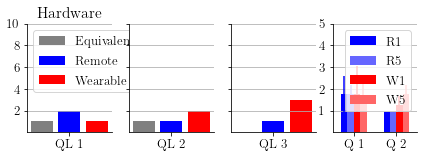

In [27]:
resp_data = {}

resp_data[easier_first] = Counter(data_hw[easier_first])
resp_data[easier_last] = Counter(data_hw[easier_last])
resp_data[prefered] = Counter(data_hw[prefered])

resp_data[easier_first]['Equivalent'] = 1
resp_data[easier_first]['Remote controller'] = 2
resp_data[easier_first]['Wearable'] = 1
resp_data[easier_last]['Equivalent'] = 1
resp_data[easier_last]['Remote controller'] = 1
resp_data[easier_last]['Wearable'] = 2
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote controller'] = 1
resp_data[prefered]['Werable'] = 3

fig = plt.figure(figsize = (7,2))

qs = ['QL 1', 'QL 2', 'QL 3']

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 4, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        
        lab = i if 'We' not in i else 'Wearable'
        if 'Re' in i:
            lab = 'Remote' 
#         lab = i if 'Remote' in i else 'Remote'
        
        plt.bar(1+idx, resp[idx], label = lab, color = c[idx])
    
    if jdx==0:
        plt.legend(loc = 'upper left')  
        plt.title('Hardware')  
        plt.yticks([2, 4, 6, 8, 10])
    else:
        plt.yticks([2, 4, 6, 8, 10], ['','','',''])
        
    if jdx==1:
        pass
#         plt.title('Responses')
    
    ax.yaxis.grid()
    plt.ylim(0,10)
    plt.xticks([2],[qs[jdx]], axes=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    


vals = []
errors = []

for idx, s in enumerate(stats_NASA_hw):
#     print(stats[s])
    
    means = [stats_NASA_hw[s][q][0] for q in questions_NASA]
    stds = [stats_NASA_hw[s][q][1] for q in questions_NASA]
    
#     print(means)
#     print(stds)
    
#     ax = plt.subplot(141+idx)
    
#     ax.bar([0, 1, 2, 3, 4],
#        means,
#        yerr=stds)
#     plt.title(s)
    
    vals.append(means[0:2])
    errors.append(stds[0:2])
    
lighter = 0.4
c1 = [0,0,1] 
c2 = [lighter,lighter,1] 
c3 = [1,0,0] 
c4 = [1,lighter,lighter]    

col = [c1, c2, c3, c4]

ax = plt.subplot(1, 4, 4)
ax = my_plots.bar_multi(vals, errors, legend = ['R1','R5','W1','W5'], ax = ax, xlabels = ['Q 1', 'Q 2'], w =0.15, xlim = [0.5,2.5], yticks = [1,2,3,4,5], save = True, where = 'learn_NASA.pdf', colors = col)
plt.yticks([1,2,3,4,5])
plt.xlim(0.5,2.5)
ax.xaxis.grid()

savefig('learn_quest_HW.pdf', bbox_inches='tight')

In [28]:
print(resp_data)

{'Which interface was easier to use in the FIRST run?': Counter({'Remote controller': 2, 'Equivalent': 1, 'Wearable': 1}), 'Which interface was easier to use in the LAST run?': Counter({'Wearable': 2, 'Equivalent': 1, 'Remote controller': 1}), 'Which interface did you prefer?': Counter({'Werable': 3, 'Remote controller': 1, 'Equivalent': 0})}


In [29]:
# print(stats_NASA_hw)

In [31]:
data_hw

{'Age': array([24, 32, 32, 25]),
 'Gender': array(['Male', 'Male', 'Female', 'Male'], dtype=object),
 'How experienced are you with the use of remote controllers?': array([10,  5,  4,  8]),
 'How experienced are you with the use of remote controllers for controlling drones?': array([10,  1,  2,  4]),
 'Which interface was easier to use in the FIRST run?': array(['Equivalent', 'Remote controller', 'Remote controller',
        'Remote controller'], dtype=object),
 'Which interface was easier to use in the LAST run?': array(['Equivalent', 'Wearable', 'Remote controller', 'Remote controller'],
       dtype=object),
 'Which interface did you prefer?': array(['Werable', 'Werable', 'Remote controller', 'Remote controller'],
       dtype=object),
 'Why?': array(['It is cooler and more innovative. ',
        'naturally controlled with less thinking',
        'the controlling is much more better',
        'With the wearable controller, you have to pay some physical efforts and the control of the